In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
nltk.download('punkt')
import re
import json
import pickle

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory= StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
more_stopword = ['co', 'id', 'oleh','minggu','sabtu','senin','selasa','rabu','kamis','jumat']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hardi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [2]:
data = pd.read_csv("DETEKSI_HOAKS.csv")
fake = data.loc[data['label']==0]
true = data.loc[data['label']==1]

In [3]:
display("fake",fake)
display("true",true)

'fake'

,label,text
0,0,Perhelatan Puncak Balapan Formula E Sepi Peno...
1,0,"Faktanya, Komisaris PT Persib Bandung Bermarta..."
2,0,Nonton Gratis Pertandingan Sepakbola Antara P...
3,0,Albert Einstein: “Kejahatan ada ketika manusi...
4,0,Surat Pengangkatan Tenaga Honorer Menjadi PNS...
...,...,...
201,0,"Viral di media sosial, sebuah video menyebut l..."
202,0,Ivan Gunawan tak menyangka dirinya dikabarkan ...
203,0,Ivan Gunawan jadi korban berita meninggal. Fa...
204,0,Ivan Gunawan jadi korban berita meninggal. Fa...


'true'

,label,text
206,1,MotoGP Jerman 2022 berlangsung seru. Baru awal...
207,1,Sebuah mobil Damkar Pemkab Kediri alami kecela...
208,1,Prakiraan cuaca besok sudah diumumkan oleh BMK...
209,1,Diri sendiri bisa menjadi musuh terbesar dalam...
210,1,Buat detikers yang hendak terabas dengan mengg...
...,...,...
501,1,"Berbarengan dengan masuknya BA.4 dan BA.5, Ind..."
502,1,Seorang gadis di Pemalang ceritakan pengalaman...
503,1,Chen Kaishi yang dikenal dengan Gu Yazhen mema...
504,1,Aksi Christina Aguilera usai penampilannya di ...


In [4]:
data['text'] = data['text'].apply(lambda x: x.lower())
for index, row in data.iterrows():
    text = row['text'].split(' ')
    if text[0] == 'jakarta':
        del text[0]
    data.iloc[index, data.columns.get_loc('text')] = ' '.join(text)
data

,label,text
0,0,perhelatan puncak balapan formula e sepi peno...
1,0,"faktanya, komisaris pt persib bandung bermarta..."
2,0,nonton gratis pertandingan sepakbola antara p...
3,0,albert einstein: “kejahatan ada ketika manusi...
4,0,surat pengangkatan tenaga honorer menjadi pns...
...,...,...
501,1,"berbarengan dengan masuknya ba.4 dan ba.5, ind..."
502,1,seorang gadis di pemalang ceritakan pengalaman...
503,1,chen kaishi yang dikenal dengan gu yazhen mema...
504,1,aksi christina aguilera usai penampilannya di ...


In [5]:
#token for unormalize data
unnormalize = []
# fakeunnormalize =[]
# true
for index, row in data.iterrows():
    text = row['text']
    #text = stopword.remove(text)
    #text = text.encode("utf-8")
    #text_decode = str(text.decode("utf-8"))
    unnormalize += nltk.word_tokenize(text)
    
print("UNNORMALIZE TOKEN", len(unnormalize))
#remove duplicates
unnormalize_clean = list( dict.fromkeys(unnormalize))
print("UNNORMALIZE REMOVE DUPS", len(unnormalize_clean))

UNNORMALIZE TOKEN 13074
UNNORMALIZE REMOVE DUPS 3987


In [6]:
def textEncode(text):
    text = text.encode("utf-8")
    text_decode = str(text.decode("utf-8"))
def casefolding(review):
    review = review.lower()
    return review
def tokenize(review):
    token =nltk.word_tokenize(review)
    return token
def filtering(review):
    review=re.sub(r'http\S+',' ',review)
    #
    review=re.sub('@[^\s]+',' ',review)
    #
    review=re.sub(r'#([^\s]+)','',review)
    #
    review=re.sub(r'[^\x00-\x7f]',r'',review)
    review=re.sub(r'(\\u[0-9A-Fa-f]+)',r'',review)
    review=re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ",review)
    review=re.sub(r'\\u\w\w\w\w','',review)
    #
    review=re.sub(r"[.,:;+!\-_<^/=?\"'\(\)\d\*]", " ",review)
    return review 
def replaceThreeOrMore(review):
    pattern= re.compile(r"(.)\1{1,}",re.DOTALL)
    return pattern.sub(r"\1\1", review)
def removeDoubleSpaces(review):
    while '  ' in review:
        review= review.replace('  ',' ')
    return review
# def convertToSlangword(review):
#     kamus_slangword = open("slangword.txt",encoding="utf8").read()
#     kamus_slangword = json.loads(kamus_slangword)
#     review = review.split(' ')
#     content=[]
#     for kata in review:
#         if kata in kamus_slangword:
#             kata = kamus_slangword[kata]
#         content.append(kata)
#     return ' '.join(content)
def removeStopword(review):
#     stopwords = open('stopwords.txt','r').read().split()
#     content= []
#     filteredtext = [word for word in review.split() if word not in stopwords]
#     content.append(" ".join(filteredtext))
#     review = content
    review = stopword.remove(review)
    return review
def process_text(s):
    
    #checking punctuation
    nopunc = [char for char in s if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    #convert string to lowercase
    clean_string = [word for word in nopunc.split() if word.lower() not in stopwords.words('indonesian')]
    return clean_string
    

In [7]:
#test
#test
normalize = []
fake = []
true = []
for index, row in data.iterrows():
    test = row['text']
    test = casefolding(test)
     #print(test)
    test = filtering(test)
    #print(test)
    test = replaceThreeOrMore(test)
    #print(test)
    test = removeDoubleSpaces(test)
    #print(test)
#     test = convertToSlangword(test)
      #print(test)
    test = removeStopword(test)
      #print(test)
    test = tokenize(test)
    #print(test)
    normalize += test
    if row['label'] == 1 :
        true += test
    else:
        fake += test
print("NORMALIZE TOKEN", len(normalize))
normalize_clean = list(dict.fromkeys(normalize))
print("NORMALIZE REMOVE DUPS", len(normalize_clean))

NORMALIZE TOKEN 6715
NORMALIZE REMOVE DUPS 2984


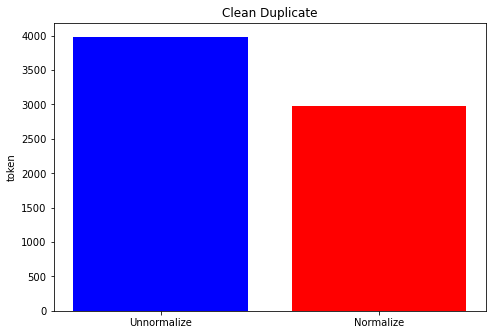

Dataset dinormalisasi sebesar 74.84324053172811%


In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax= fig.add_axes([0,0,1,1])
langs = ['Unnormalize', 'Normalize']
students = [len(unnormalize_clean),len(normalize_clean)]
ax.bar(langs,students,color=['blue','red'])
ax.set_ylabel('token')
plt.title("Clean Duplicate")
plt.show()
normalpercent = (len(normalize_clean)/len(unnormalize_clean))*100
print("Dataset dinormalisasi sebesar "+ str(normalpercent)+"%")

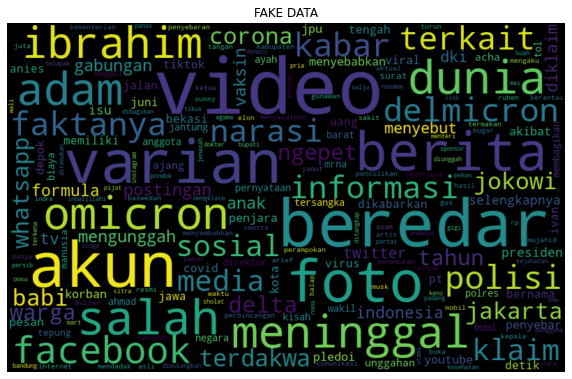

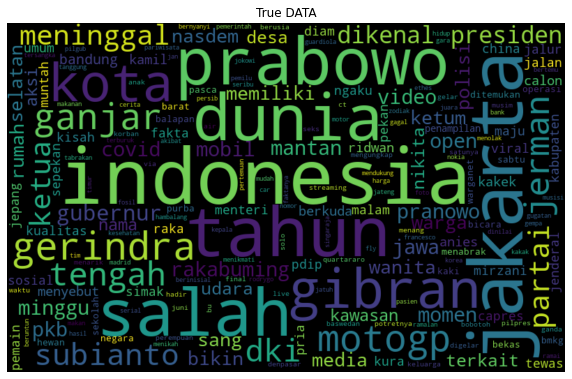

In [9]:
from wordcloud import WordCloud
all_words = ' '.join(normalize)
wordcloud = WordCloud(width=800, height=500,
                     max_font_size = 110,
                     collocations = False).generate(all_words)

all_words = ' '.join(fake)
wordcloud = WordCloud(width=800, height=500,
                     max_font_size = 110,
                     collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("FAKE DATA")
plt.show()

all_words = ' '.join(true)
wordcloud = WordCloud(width=800, height=500,
                     max_font_size = 110,
                     collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("True DATA")
plt.show()

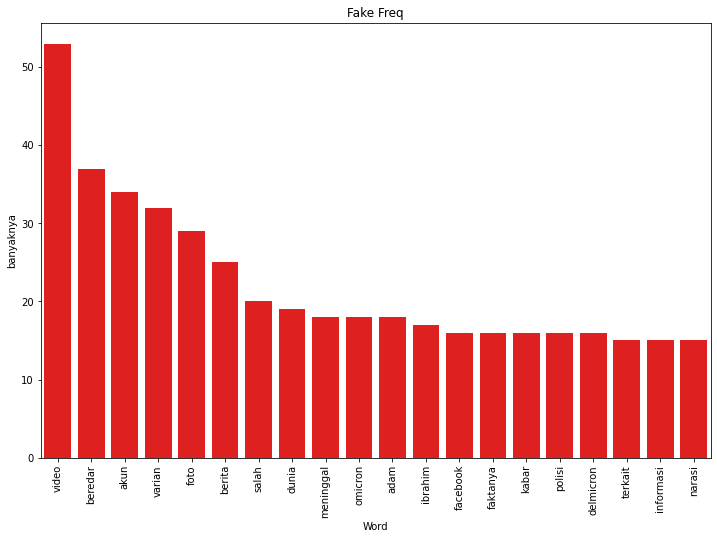

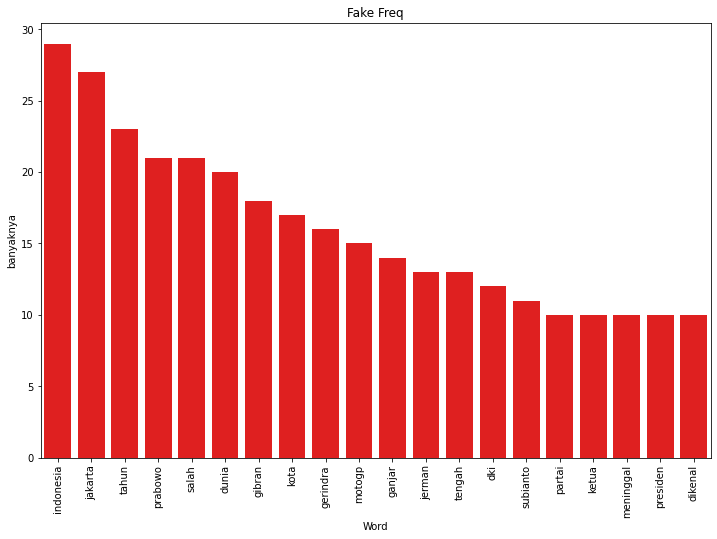

In [10]:
token_phrase = normalize
frequency = nltk.FreqDist(token_phrase)
df_frequency = pd.DataFrame({"Word":list(frequency.keys()),
                            "Frequency":list(frequency.values())})
token_phrase = fake
frequency = nltk.FreqDist(token_phrase)
df_frequency = pd.DataFrame({"Word":list(frequency.keys()),
                            "Frequency":list(frequency.values())})
df_frequency = df_frequency.nlargest(columns = "Frequency", n = 20)
plt.figure(figsize=(12,8))
ax= sns.barplot(data=df_frequency, x = "Word", y="Frequency", color= 'red')
ax.set(ylabel = "banyaknya")
plt.xticks(rotation = 'vertical')
plt.title('Fake Freq')
plt.show()

token_phrase = true
frequency = nltk.FreqDist(token_phrase)
df_frequency = pd.DataFrame({"Word":list(frequency.keys()),
                            "Frequency":list(frequency.values())})
df_frequency = df_frequency.nlargest(columns = "Frequency", n = 20)
plt.figure(figsize=(12,8))
ax= sns.barplot(data=df_frequency, x = "Word", y="Frequency", color ='red')
ax.set(ylabel = "banyaknya")
plt.xticks(rotation = 'vertical')
plt.title('Fake Freq')
plt.show()

In [11]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory,StopWordRemover, ArrayDictionary

stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopword = ['co', 'id', 'oleh','minggu','sabtu','senin','selasa','rabu','kamis','jumat']

new_stopword = stop_factory+ more_stopword
dictionary = ArrayDictionary(new_stopword)
stopword = StopWordRemover(dictionary)
stopword


In [12]:
def process_text(review):
    review = review.lower()
    review=re.sub(r'http\S+',' ',review)
    #
    review=re.sub('@[^\s]+',' ',review)
    #
    review=re.sub(r'#([^\s]+)','',review)
    #
    review=re.sub(r'[^\x00-\x7f]',r'',review)
    review=re.sub(r'(\\u[0-9A-Fa-f]+)',r'',review)
    review=re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ",review)
    review=re.sub(r'\\u\w\w\w\w','',review)
    #
    review=re.sub(r"[.,:;+!\-_<^/=?\"'\(\)\d\*]", " ",review)
    pattern= re.compile(r"(.)\1{1,}",re.DOTALL)
    review = pattern.sub(r"\1\1", review)

    while '  ' in review:
        review= review.replace('  ',' ')
    review = stopword.remove(review)
    token =nltk.word_tokenize(review)
    return token
def rebrand(review):
    if review['label'] == 0:
        review['label'] = 'fake'
    else:
        review['label'] = 'true'
    return review

In [13]:
data_rebrand = data.apply(rebrand,axis = 1)
dataprocessed = data_rebrand.sample(frac=1)
dataprocessed

,label,text
276,true,viktor axelsen menjuarai indonesia open 2022. ...
446,true,cdc di as akhirnya mengeluarkan rekomendasi va...
208,true,prakiraan cuaca besok sudah diumumkan oleh bmk...
1,fake,"faktanya, komisaris pt persib bandung bermarta..."
423,true,prabowo menitipkan oleh-oleh untuk jan ethes k...
...,...,...
502,true,seorang gadis di pemalang ceritakan pengalaman...
157,fake,ksp memastikan kabar virus corona varian omicr...
488,true,kedatangan erik ten hag boleh jadi bikin para ...
485,true,"indonesia open 2022 memasuki babak final, ming..."


In [14]:
import string
def process_text2(s):
    
    #checking punctuation
    nopunc = [char for char in s if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    #convert string to lowercase
    clean_string = [word for word in nopunc.split() if word.lower() not in new_stopword]
    return clean_string

In [46]:
dataprocessed['token'] = dataprocessed['text'].apply(process_text)
dataprocessed['token']

276    [viktor, axelsen, menjuarai, indonesia, open, ...
446    [cdc, as, mengeluarkan, rekomendasi, vaksin, c...
208    [prakiraan, cuaca, besok, diumumkan, bmkg, pra...
1      [faktanya, komisaris, pt, persib, bandung, ber...
423    [prabowo, menitipkan, jan, ethes, gibran, ment...
                             ...                        
502    [gadis, pemalang, ceritakan, pengalaman, strok...
157    [ksp, kabar, virus, corona, varian, omicron, m...
488    [kedatangan, erik, ten, hag, bikin, pemain, ma...
485    [indonesia, open, memasuki, babak, final, chin...
236    [liu, yu, chen, ou, xuan, yi, meraih, gelar, j...
Name: token, Length: 506, dtype: object

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
import string

In [45]:
dataprocessed.sample(40)
bow_transformer = CountVectorizer(analyzer=process_text2).fit(dataprocessed['token'])

print(len(bow_transformer.vocabulary_))

480


In [43]:
dataprocessed['token']

276    [viktor, axelsen, menjuarai, indonesia, open, ...
446    [cdc, as, mengeluarkan, rekomendasi, vaksin, c...
208    [prakiraan, cuaca, besok, diumumkan, bmkg, pra...
1      [faktanya, komisaris, pt, persib, bandung, ber...
423    [prabowo, menitipkan, jan, ethes, gibran, ment...
                             ...                        
502    [gadis, pemalang, ceritakan, pengalaman, strok...
157    [ksp, kabar, virus, corona, varian, omicron, m...
488    [kedatangan, erik, ten, hag, bikin, pemain, ma...
485    [indonesia, open, memasuki, babak, final, chin...
236    [liu, yu, chen, ou, xuan, yi, meraih, gelar, j...
Name: token, Length: 506, dtype: object

In [19]:
news_bow = bow_transformer.transform(dataprocessed['token'])

In [20]:
print('shape :',news_bow.shape)
print('amnt of non zero occ :',news_bow.nnz)

shape : (506, 486)
amnt of non zero occ : 506


In [21]:
spars = (100.0 *news_bow.nnz/(news_bow.shape[0]*news_bow.shape[1]))
print('spars: {}'.format(round(spars)))

spars: 0


In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(news_bow)
news_tfidf = tfidf_transformer.transform(news_bow)
print(news_tfidf.shape)

(506, 486)


In [23]:
#train nbmodel
from sklearn.naive_bayes import MultinomialNB
fakenews_detect_model = MultinomialNB().fit(news_tfidf,dataprocessed['label'])


In [24]:
prediction = fakenews_detect_model.predict(news_tfidf)
print(prediction)

['true' 'true' 'true' 'fake' 'true' 'fake' 'fake' 'fake' 'fake' 'true'
 'true' 'true' 'true' 'true' 'fake' 'true' 'true' 'true' 'true' 'true'
 'true' 'fake' 'fake' 'true' 'true' 'fake' 'true' 'fake' 'fake' 'true'
 'true' 'fake' 'fake' 'true' 'fake' 'fake' 'true' 'true' 'fake' 'true'
 'true' 'true' 'true' 'fake' 'true' 'true' 'fake' 'fake' 'fake' 'true'
 'true' 'true' 'true' 'fake' 'true' 'fake' 'true' 'true' 'true' 'fake'
 'true' 'true' 'fake' 'fake' 'true' 'true' 'true' 'fake' 'true' 'true'
 'true' 'true' 'true' 'true' 'true' 'true' 'true' 'true' 'true' 'true'
 'true' 'true' 'fake' 'true' 'fake' 'true' 'fake' 'fake' 'true' 'true'
 'true' 'true' 'true' 'true' 'true' 'fake' 'true' 'fake' 'true' 'fake'
 'true' 'fake' 'true' 'fake' 'true' 'true' 'true' 'true' 'true' 'fake'
 'true' 'true' 'true' 'fake' 'true' 'true' 'fake' 'fake' 'fake' 'true'
 'true' 'fake' 'true' 'fake' 'true' 'true' 'fake' 'true' 'true' 'fake'
 'fake' 'fake' 'true' 'true' 'true' 'fake' 'true' 'true' 'fake' 'true'
 'true

In [25]:
from sklearn.metrics import classification_report
print (classification_report(dataprocessed['label'],prediction))

              precision    recall  f1-score   support

        fake       1.00      1.00      1.00       206
        true       1.00      1.00      1.00       300

    accuracy                           1.00       506
   macro avg       1.00      1.00      1.00       506
weighted avg       1.00      1.00      1.00       506



In [26]:
from sklearn.model_selection import train_test_split 
news_train, news_test,text_train,text_test = train_test_split(dataprocessed['text'],dataprocessed['label'],test_size = 0.3,random_state=0)

print(len(news_train), len(news_test), len(news_train)+len(news_test))

354 152 506


In [49]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=process_text)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB(alpha = 1.0)),
])
pipeline.fit(news_train,text_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function process_text at 0x0000027423579EE0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [50]:
news_test

49      boba nyangkut di usus buntu gak bisa dicerna ...
270    setelah enam episode berlalu, drama korea eve ...
198    warga pendatang mengungsi ke polres setempat k...
249    masyarakat desa adat intaran, denpasar, gelar ...
499    ada sejumlah cairan di dunia ini yang memiliki...
                             ...                        
423    prabowo menitipkan oleh-oleh untuk jan ethes k...
228    mari angkat topi buat pep guardiola. sejak ber...
158    terdakwa adam ibrahim divonis 4 tahun penjara ...
192    polisi akhirnya mengungkap sosok direktur tv s...
45      dpw partai nasdem diy buat baliho dukung anie...
Name: text, Length: 152, dtype: object

In [29]:
test =news_test.iloc[0]
test =' Panggilan Interview Kerja oleh PT Petrogas Jatim Utama Melalui WhatsApp  Beredar informasi melalui WhatsApp terkait dengan panggilan interview kerja di PT Petrogas Jatim Utama.'
prediksi = pipeline.predict([test]) 
prediksi

array(['fake'], dtype='<U4')

In [30]:
predictions = pipeline.predict(news_test)
#print(predictions)
print(classification_report(predictions,text_test))

              precision    recall  f1-score   support

        fake       0.83      0.84      0.83        62
        true       0.89      0.88      0.88        90

    accuracy                           0.86       152
   macro avg       0.86      0.86      0.86       152
weighted avg       0.86      0.86      0.86       152



In [31]:
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score

# acc_score = accuracy_score(text_test, prediksi)
conf_mat = confusion_matrix(
        text_test, predictions)
print (conf_mat)

[[52 11]
 [10 79]]
